## Table Of Contents:
* [Importing Data](#importing-data)
* [Cleaning Data](#cleaning-data)
    - [NaN Check](#nan-check)
* [Queries](#queries)

# 1. Importing data <a class="anchor" id="importing-data"></a>

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("material_flow.csv")

In [116]:
def remove_rows_from_dataset(rows, df):
    return df[~df["Country"].isin(rows)]

# 2. Cleaning data <a class="anchor" id="cleaning-data"></a>

In [117]:
rows_to_remove = ["World", "Asia + Pacific", "North America", "EECCA", "West Asia", "Africa", "Europe", "Latin America + Caribbean"]
df = remove_rows_from_dataset(rows_to_remove, df)
df

,Country,Category,Flow name,Flow code,Flow unit,1970,1971,1972,1973,1974,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Biomass,Domestic Extraction,DE,t,29427854.0,28777035.0,27200896.0,29147772.0,30519158.0,...,37406375.0,37961488.0,35542253.0,33625557.0,39501360.0,41190154.0,37576686.0,37891437.0,38353304.0,38628527.0
1,Afghanistan,Biomass,Domestic Material Consumption,DMC,t,29476560.0,29136965.0,27290656.0,29112673.0,30433539.0,...,40423146.0,41655757.0,40992559.0,38552083.0,43433438.0,45294467.0,39730808.0,40083922.0,40596386.0,40905900.0
2,Afghanistan,Biomass,Domestic Material Input,DMI,t,29617873.0,29282898.0,27485608.0,29306247.0,30656605.0,...,40740301.0,42111457.0,41553874.0,39515927.0,44428717.0,46059807.0,40992155.0,41370148.0,41905797.0,42238460.0
3,Afghanistan,Biomass,Exports,EXP,t,141313.0,145933.0,194952.0,193574.0,223066.0,...,317155.0,455700.0,561315.0,963844.0,995279.0,765341.0,1261347.0,1286226.0,1309411.0,1332559.0
4,Afghanistan,Biomass,Imports,IMP,t,190019.0,505863.0,284712.0,158475.0,137447.0,...,3333926.0,4149969.0,6011621.0,5890371.0,4927357.0,4869653.0,3415470.0,3478710.0,3552492.0,3609933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,Waste for final treatment and disposal,Domestic Material Consumption,DMC,t,0.0,0.0,0.0,0.0,0.0,...,134.0,-153.0,-911.0,125.0,137.0,137.0,140.0,144.0,140.0,148.0
15572,Zimbabwe,Waste for final treatment and disposal,Domestic Material Input,DMI,t,0.0,0.0,0.0,0.0,0.0,...,690.0,540.0,236.0,379.0,436.0,425.0,442.0,453.0,456.0,471.0
15573,Zimbabwe,Waste for final treatment and disposal,Exports,EXP,t,0.0,0.0,0.0,0.0,0.0,...,555.0,693.0,1147.0,254.0,299.0,289.0,302.0,309.0,316.0,323.0
15574,Zimbabwe,Waste for final treatment and disposal,Imports,IMP,t,0.0,0.0,0.0,0.0,0.0,...,690.0,540.0,236.0,379.0,436.0,425.0,442.0,453.0,456.0,471.0


The columns that are related to datetime year.

In [118]:
year_colums = [str(y) for y in range(1970, 2025)]

All the columns present in the DataFrame

In [119]:
df.columns

Index(['Country', 'Category', 'Flow name', 'Flow code', 'Flow unit', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

## 2.1 NaN Check <a class="anchor" id="nan-check"></a>

In [120]:
is_nan_df = df.isna()

In [121]:
# If a value is NaN is has True in is_nan_df. We could check if there is any True value
any(is_nan_df["1970"])

True

In [122]:
nan_list = []
for c in is_nan_df.columns:
    if any(is_nan_df[c]):
        nan_list.append(c)

print(nan_list)
    

['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [123]:
# Domestic Extraction	Fossil fuels (countries that extract petroleum)
# Products from fossil fuel/import (countries that buy gas n stuff)
# Products from biomass   export (countries that export other types of fuel like charcoal, methane, hydrogene

# 3. Queries <a class="anchor" id="queries"></a>

In [146]:
flows = df["Flow name"].drop_duplicates().values
flows

array(['Domestic Extraction', 'Domestic Material Consumption',
       'Domestic Material Input', 'Exports', 'Imports',
       'Material Footprint (RMC)', 'Physical Trade Balance',
       'Raw Material Equivalents of exports',
       'Raw Material Equivalents of imports'], dtype=object)

In [147]:
categories = df["Category"].drop_duplicates().values
categories

array(['Biomass', 'Excavated earthen materials (including soil) nec',
       'Fossil fuels', 'Metal ores', 'Mixed and complex products nec.',
       'Non-metallic minerals', 'Products from biomass',
       'Products from fossil fuels', 'Products from metals',
       'Products from non-metallic minerals',
       'Waste for final treatment and disposal'], dtype=object)

## 3.1 Domestic extraction of fossil fuels for selected years

In [126]:
# Chart for the countries that extract petroleum (2024)
YEAR = "2024"
FLOW_NAME = "Domestic Extraction"
CATEGORY = "Fossil fuels"

years_filter = ["Country"] + ["1970", "1990", "2010", "2024"] 

petroleum_extraction_filter = (df["Flow name"] == FLOW_NAME) & (df["Category"] == CATEGORY)

# Filter for this chart only
df_petroleum_extraction = df[petroleum_extraction_filter][years_filter]
df_petroleum_extraction

,Country,1970,1990,2010,2024
14,Afghanistan,1705428.0,256008.0,824750.0,112715.0
156,Albania,2197796.0,3403676.0,763634.0,975464.0
227,Algeria,49756388.0,95895740.0,134692072.0,127208042.0
365,Angola,5095222.0,23922360.0,88916372.0,65369338.0
544,Argentina,24687803.0,40464212.0,64560154.0,66935948.0
...,...,...,...,...,...
15042,Viet Nam,2990000.0,7335178.0,66751750.0,76344861.0
15307,Yemen,0.0,0.0,18013870.0,2543879.0
15377,Yugoslavia SFR,34104604.0,83227334.0,NaN,NaN
15448,Zambia,781000.0,377000.0,1000.0,1114015.0


In [127]:
# Drop NaN rows and 0 value rows
df_petroleum_extraction = df_petroleum_extraction.dropna()
df_petroleum_extraction = df_petroleum_extraction[df_petroleum_extraction[YEAR] > 0]

# Sort descending
df_petroleum_extraction = df_petroleum_extraction.sort_values(YEAR, ascending=False)

df_petroleum_extraction = df_petroleum_extraction.head()
df_petroleum_extraction

,Country,1970,1990,2010,2024
2843,China,4.185122e+08,1.144155e+09,3.428682e+09,4.292080e+09
14593,United States of America,1.467834e+09,1.696291e+09,1.724018e+09,1.880163e+09
2458,Canada,1.447803e+08,3.752767e+08,9.318910e+08,1.376694e+09
6234,India,7.363124e+07,2.501551e+08,6.411775e+08,9.551850e+08
6305,Indonesia,4.366572e+07,1.197845e+08,4.340493e+08,6.741477e+08


In [132]:
melted_data = pd.melt(
    df_petroleum_extraction,
    id_vars=["Country"],
    value_vars=years_filter,
    var_name="Year",
    value_name="Value"
)
melted_data

,Country,Year,Value
0,China,1970,4.185122e+08
1,United States of America,1970,1.467834e+09
2,Canada,1970,1.447803e+08
3,India,1970,7.363124e+07
4,Indonesia,1970,4.366572e+07
5,China,1990,1.144155e+09
6,United States of America,1990,1.696291e+09
7,Canada,1990,3.752767e+08
8,India,1990,2.501551e+08
9,Indonesia,1990,1.197845e+08


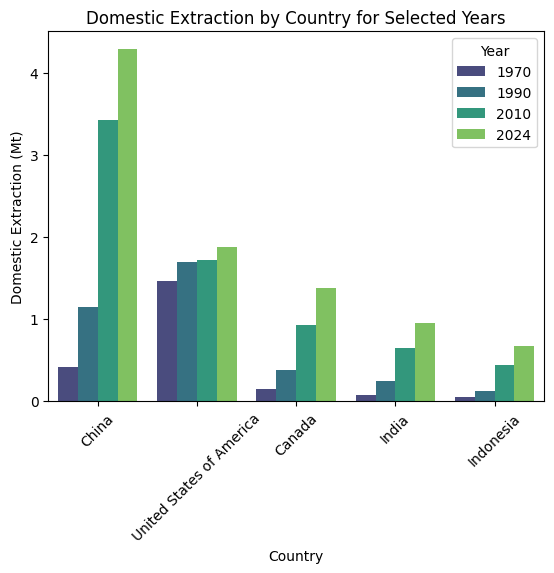

In [142]:
plot = sb.barplot(
    data=melted_data,
    x="Country",
    y="Value",
    hue="Year",
    palette="viridis"
)

plt.xticks(df_petroleum_extraction["Country"], rotation=45)
plot.yaxis.offsetText.set_visible(False)

plt.xlabel("Country")
plt.ylabel(f"{FLOW_NAME} (Mt)")  # Use the flow unit from the data

plt.title(f"{FLOW_NAME} by Country for Selected Years")
plt.legend(title="Year")

plt.show()

## 3.2 Exports of metal ores by Country for selected Years

In [153]:
# Chart for the countries that extract petroleum (2024)
FLOW_NAME = "Exports"
CATEGORY = "Metal ores"

years_filter = ["Country"] + ["1970", "1990", "2010", "2024"] 

metal_ores_exports_filter = (df["Flow name"] == FLOW_NAME) & (df["Category"] == CATEGORY)

# Filter for this chart only
metal_ores_exports = df[metal_ores_exports_filter][years_filter]
metal_ores_exports

,Country,1970,1990,2010,2024
26,Afghanistan,0.0,0.0,0.0,5302.0
168,Albania,0.0,0.0,1001883.0,727721.0
239,Algeria,3016341.0,370191.0,126718.0,30363.0
312,Andorra,0.0,0.0,1674.0,1210.0
377,Angola,5437482.0,338.0,0.0,24753.0
...,...,...,...,...,...
15112,Wallis and Futuna Islands,0.0,0.0,0.0,0.0
15318,Yemen,0.0,0.0,17289.0,258.0
15389,Yugoslavia SFR,3267638.0,3342607.0,NaN,NaN
15460,Zambia,774633.0,0.0,996094.0,1225633.0


In [155]:
# Drop NaN rows and 0 value rows
metal_ores_exports = metal_ores_exports.dropna()
metal_ores_exports = metal_ores_exports[metal_ores_exports[YEAR] > 0]

# Sort descending
metal_ores_exports = metal_ores_exports.sort_values(YEAR, ascending=False)

metal_ores_exports = metal_ores_exports.head()
metal_ores_exports

,Country,1970,1990,2010,2024
826,Australia,63901040.0,116851315.0,469960142.0,1.027887e+09
1928,Brazil,31088999.0,133917769.0,340102786.0,4.338005e+08
12607,South Africa,2317377.0,0.0,71807073.0,1.253123e+08
2855,China,0.0,5693499.0,64258042.0,8.354962e+07
2470,Canada,34858535.0,36993905.0,46157264.0,6.929910e+07


In [156]:
melted_data = pd.melt(
    metal_ores_exports,
    id_vars=["Country"],
    value_vars=years_filter,
    var_name="Year",
    value_name="Value"
)
melted_data

,Country,Year,Value
0,Australia,1970,6.390104e+07
1,Brazil,1970,3.108900e+07
2,South Africa,1970,2.317377e+06
3,China,1970,0.000000e+00
4,Canada,1970,3.485854e+07
5,Australia,1990,1.168513e+08
6,Brazil,1990,1.339178e+08
7,South Africa,1990,0.000000e+00
8,China,1990,5.693499e+06
9,Canada,1990,3.699390e+07


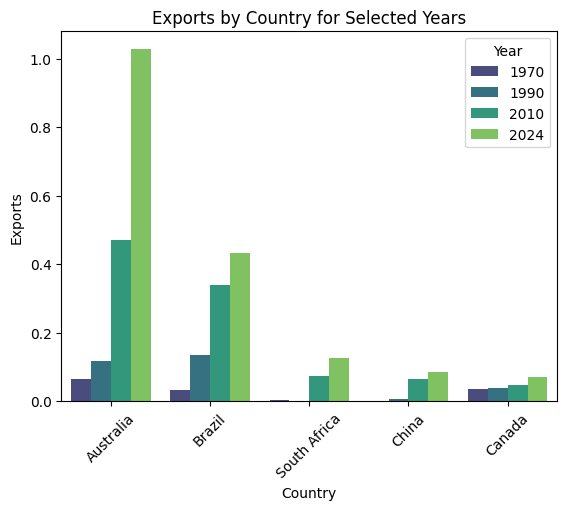

In [158]:
plot = sb.barplot(
    data=melted_data,
    x="Country",
    y="Value",
    hue="Year",
    palette="viridis"
)

plt.xticks(metal_ores_exports["Country"], rotation=45)
plot.yaxis.offsetText.set_visible(False)

plt.xlabel("Country")
plt.ylabel(f"{FLOW_NAME}")  # Use the flow unit from the data

plt.title(f"{FLOW_NAME} by Country for Selected Years")
plt.legend(title="Year")

plt.show()